In [137]:
!pip install pandas

/bin/bash: /home/andras/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [138]:
!pip install matplotlib

/bin/bash: /home/andras/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import inspect

In [140]:
column_names = ['ID','Name','CPU_Percentage','Memory_Usage','Memory_Percentage','Net_IO','Block_IO']

# Read all files and concatenate them into a single DataFrame
df_1 = pd.read_csv('../results/CURRENT/stats/dls-10-100.log', names=column_names, header=0)
df_2 = pd.read_csv('../results/CURRENT/stats/dls-15-200.log', names=column_names, header=0)

plot_name1 = 'DLS Depth limit:10 Weight limit: 100'
plot_name2 = 'DLS Depth limit:15 Weight limit: 200'

In [141]:
def conv(s):
    # Extract all numbers (including decimals) as strings along with their units
    number_strings_with_units = re.findall(r'(\d+(?:\.\d+)?)([GMKk]?i?B)', s)

    numbers = []
    for num_str, unit in number_strings_with_units:
        num = float(num_str)
        if unit in ['GiB', 'GB']:
            num *= 10**6
        elif unit in ['MiB', 'MB']:
            num *= 10**3
        # elif unit in ['KiB', 'kB', 'KB']:
        #     num *= 10**(-3)
        numbers.append(num)

    return numbers

In [142]:
def format_df(df):
    # Remove "%" sign from columns with percentages
    df = df.drop('ID', axis=1)
    df['Name'] = df['Name'].apply(str.strip)
    df['CPU_Percentage'] = df['CPU_Percentage'].str.replace('%', '').astype(float)
    df['Memory_Percentage'] = df['Memory_Percentage'].str.replace('%', '').astype(float)
    df['Memory_Usage'] = df['Memory_Usage'].apply(conv)
    df['Net_IO'] = df['Net_IO'].apply(conv)
    df['Block_IO'] = df['Block_IO'].apply(conv)
    df[['Memory_in_use', 'Available_memory']] = pd.DataFrame(df['Memory_Usage'].tolist(), index=df.index)
    df[['Net_IO_in', 'Net_IO_out']] = pd.DataFrame(df['Net_IO'].tolist(), index=df.index)
    df[['Block_IO_in', 'Block_IO_out']] = pd.DataFrame(df['Block_IO'].tolist(), index=df.index)
    return df

df_1 = format_df(df_1)
df_2 = format_df(df_2)

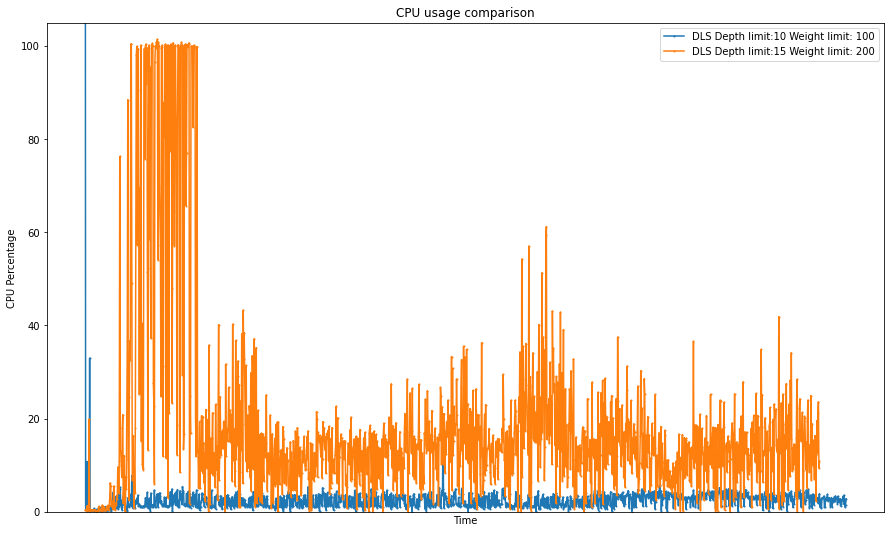

In [143]:
def do_cpu(name1, df_1, name2, df_2):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Plot series from df_1
    ax.plot(df_1['CPU_Percentage'], 'o-', markersize=1, label=name1)

    # Plot series from df_2
    ax.plot(df_2['CPU_Percentage'], 'o-', markersize=1, label=name2)

    ax.set_title('CPU usage comparison')
    ax.set_xlabel('Time')
    ax.set_ylabel('CPU Percentage')
    ax.set_xticks([])
    ax.legend()
    ax.set_ylim([0, 105])

    plt.savefig('{}_{}_do_cpu_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_cpu(plot_name1, df_1, plot_name2, df_2)


/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


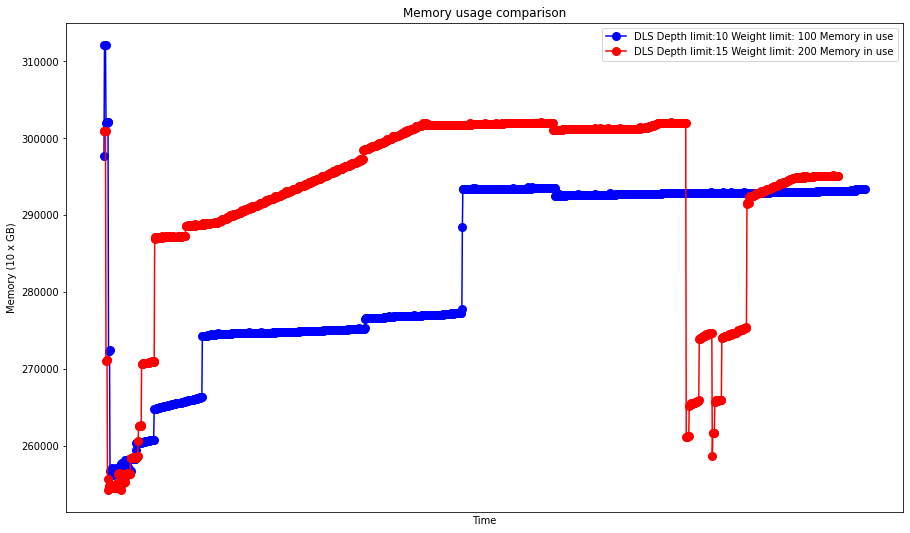

In [148]:
def do_mem(name1, df_1, name2, df_2):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Plot series from df_1
    df_1.plot(y='Memory_in_use', style='o-', marker='o', markersize=8, color='blue', ax=ax)
    ax.set_ylabel('Memory (10 x GB)')
    ax.set_title('Memory usage comparison')
    ax.legend([f'{name1} Memory in use'])

    # Plot series from df_2
    df_2.plot(y='Memory_in_use', style='o-', marker='o', markersize=8, color='red', ax=ax)
    ax.legend([f'{name1} Memory in use', f'{name2} Memory in use'])

    ax.set_xlabel('Time')
    ax.set_xticks([])

    plt.savefig('{}_{}_do_mem_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_mem(plot_name1, df_1, plot_name2, df_2)


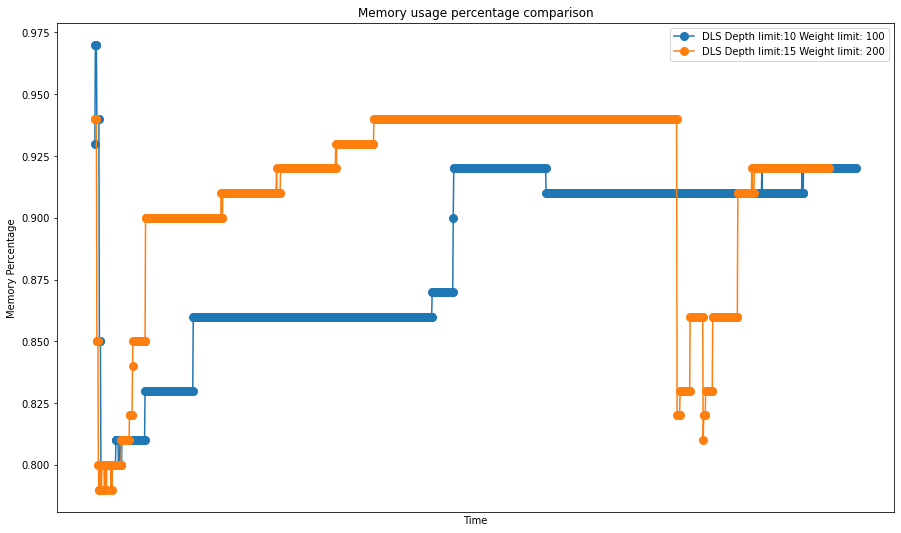

In [149]:
def do_mem_perc(name1, df_1, name2, df_2):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Plot series from df_1
    ax.plot(df_1['Memory_Percentage'], 'o-', markersize=8, label=name1)

    # Plot series from df_2
    ax.plot(df_2['Memory_Percentage'], 'o-', markersize=8, label=name2)

    ax.set_title('Memory usage percentage comparison')
    ax.set_xlabel('Time')
    ax.set_ylabel('Memory Percentage')
    ax.set_xticks([])
    ax.legend()

    plt.savefig('{}_{}_do_mem_perc_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_mem_perc(plot_name1, df_1, plot_name2, df_2)



/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


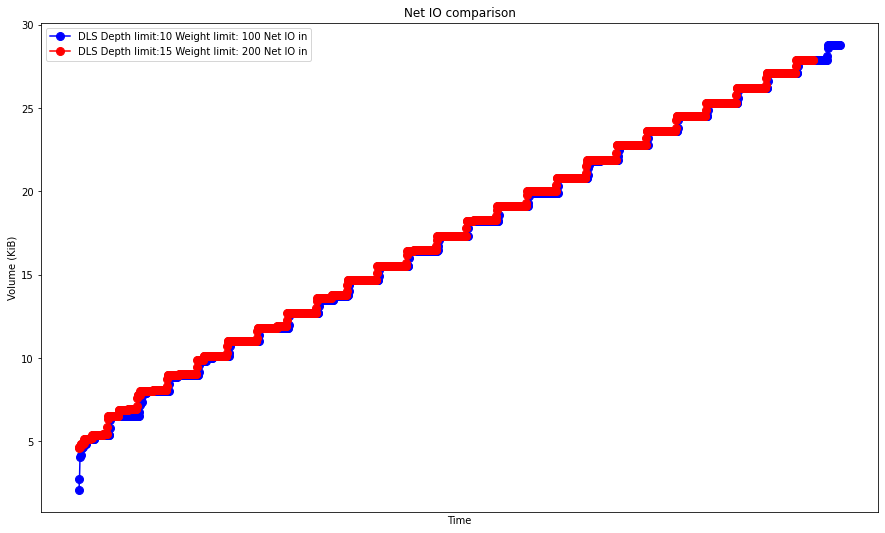

In [150]:
def do_io(name1, df_1, name2, df_2):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Plot series from df_1
    df_1.plot(y='Net_IO_in', style='o-', marker='o', markersize=8, color='blue', ax=ax)
    ax.set_ylabel('Volume (KiB)')
    ax.set_title('Net IO comparison')
    plt.legend([f'{name1} Net IO in'])

    # Plot series from df_2
    df_2.plot(y='Net_IO_in', style='o-', marker='o', markersize=8, color='red', ax=ax)
    plt.legend([f'{name1} Net IO in', f'{name2} Net IO in'])

    plt.xlabel('Time')
    plt.gca().set_xticks([])

    plt.savefig('{}_{}_do_io_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_io(plot_name1, df_1, plot_name2, df_2)


/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


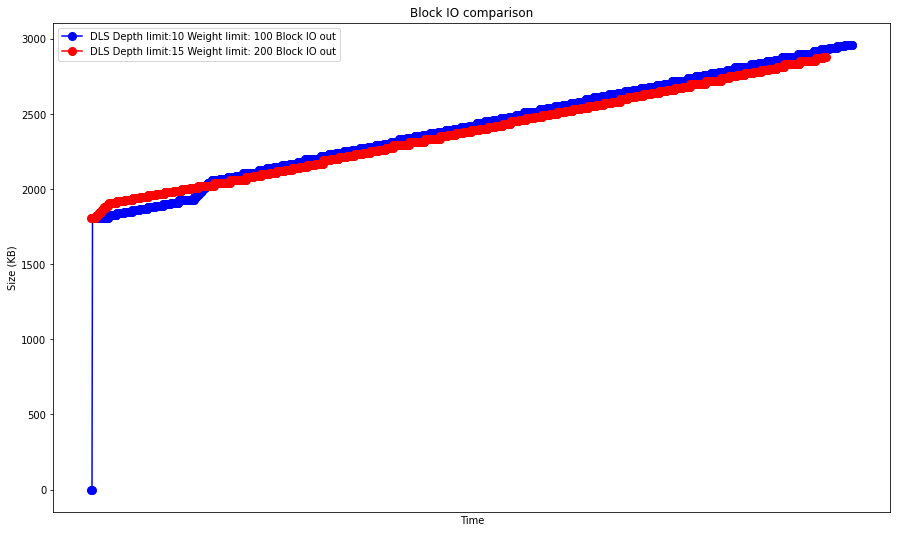

In [151]:
def do_block_io(name1, df_1, name2, df_2):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Plot series from df_1
    df_1.plot(y='Block_IO_out', style='o-', marker='o', markersize=8, color='blue', ax=ax)
    ax.set_ylabel('Size (KB)')
    ax.set_title('Block IO comparison')
    ax.legend([f'{name1} Block IO out'])

    # Plot series from df_2
    df_2.plot(y='Block_IO_out', style='o-', marker='o', markersize=8, color='red', ax=ax)
    ax.legend([f'{name1} Block IO out', f'{name2} Block IO out'])

    ax.set_xlabel('Time')
    ax.set_xticks([])

    plt.savefig('{}_{}_do_block_io_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_block_io(plot_name1, df_1, plot_name2, df_2)
